# Goal

* Goal is to create a figure like above per Category (or any sub-grouping - could be Customer, Product, etc.)
 * Would like two line graphs to compare different 52 week or 365 day periods, besides the Week 1 - Week 53 shown above
* For example - would like to compare & visualize the following:
    * Week 14 2021 to Week 13 2022 vs. 
    * Week 14 2020 to Week 13 2021
    * Week 14 2019 to Week 13 2020

![0]

[0]: Graph.jpg

## Imports and make seaborn nicer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
sns.set_theme(rc={'figure.dpi': 144}, font_scale=0.7)

In [2]:
#create random dataframe

np.random.seed(1111)
df = pd.DataFrame({
'Category':np.random.choice( ['Group A','Group B','Group C','Group D'], 10000),
'Sub-Category':np.random.choice( ['X','Y','Z'], 10000),
'Sub-Category-2':np.random.choice( ['G','F','I'], 10000),
'Product':np.random.choice( ['Product 1','Product 2','Product 3'], 10000),
'Units_Sold':np.random.randint(1,100, size=(10000)),
'Dollars_Sold':np.random.randint(100,1000, size=10000),
'Customer':np.random.choice(["Customer1", "Customer2", "Customer3","Customer4","Customer5","Customer6"],10000),
'Date':np.random.choice( pd.date_range('1/1/2018','03/12/2022',  
                      freq='D'), 10000)})


#add year & week of year to dataframe
df['Year'] = df['Date'].dt.year
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype('int64')
df.head()

,Category,Sub-Category,Sub-Category-2,Product,Units_Sold,Dollars_Sold,Customer,Date,Year,WeekOfYear
0,Group A,X,I,Product 2,2,766,Customer2,2019-06-19,2019,25
1,Group D,Y,I,Product 1,77,829,Customer2,2020-01-09,2020,2
2,Group B,X,I,Product 3,48,772,Customer3,2019-03-26,2019,13
3,Group B,Y,F,Product 1,55,894,Customer1,2021-03-18,2021,11
4,Group A,X,F,Product 3,53,629,Customer5,2021-04-17,2021,15


In [3]:
df_week = df.groupby(['Category', 'Year', 'WeekOfYear'])['Units_Sold'].sum().reset_index(name='Units')
df_week

,Category,Year,WeekOfYear,Units
0,Group A,2018,1,424
1,Group A,2018,2,657
2,Group A,2018,3,328
3,Group A,2018,4,684
4,Group A,2018,5,480
...,...,...,...,...
879,Group D,2022,7,884
880,Group D,2022,8,816
881,Group D,2022,9,693
882,Group D,2022,10,440


## Shifting the week

This is a trick to shift the week up. Can do the same for days

In [4]:
WEEK_SHIFT = 4
df_week['Time Group'] = df_week.groupby('Category')['WeekOfYear'].transform(lambda x: (x == WEEK_SHIFT).cumsum())
df_week.head(10)

,Category,Year,WeekOfYear,Units,Time Group
0,Group A,2018,1,424,0
1,Group A,2018,2,657,0
2,Group A,2018,3,328,0
3,Group A,2018,4,684,1
4,Group A,2018,5,480,1
5,Group A,2018,6,618,1
6,Group A,2018,7,569,1
7,Group A,2018,8,451,1
8,Group A,2018,9,407,1
9,Group A,2018,10,533,1


## Create string of new group

In [5]:
g = df_week.groupby(['Category', 'Time Group'])

first_week = g['WeekOfYear'].transform('first').astype('str')
last_week = g['WeekOfYear'].transform('last').astype('str')

first_year = g['Year'].transform('first').astype('str')
last_year = g['Year'].transform('last').astype('str')

df_week['Named Group'] = 'Wk ' + first_week + ' ' + first_year + ' - ' + 'Wk ' + last_week + ' ' + last_year
df_week

,Category,Year,WeekOfYear,Units,Time Group,Named Group
0,Group A,2018,1,424,0,Wk 1 2018 - Wk 3 2018
1,Group A,2018,2,657,0,Wk 1 2018 - Wk 3 2018
2,Group A,2018,3,328,0,Wk 1 2018 - Wk 3 2018
3,Group A,2018,4,684,1,Wk 4 2018 - Wk 3 2019
4,Group A,2018,5,480,1,Wk 4 2018 - Wk 3 2019
...,...,...,...,...,...,...
879,Group D,2022,7,884,5,Wk 4 2022 - Wk 52 2022
880,Group D,2022,8,816,5,Wk 4 2022 - Wk 52 2022
881,Group D,2022,9,693,5,Wk 4 2022 - Wk 52 2022
882,Group D,2022,10,440,5,Wk 4 2022 - Wk 52 2022


## Get cumulative sum of units and re-number week beginning at 0

Re-numbering week is for plotting - want first week to be 1 - will fix with formatting

In [6]:
def week_transform(x):
    x = x - WEEK_SHIFT + 1
    return np.where(x < 1, x + max(52, x.max()), x)

In [7]:
df_week['Units_cumsum'] = df_week.groupby(['Category', 'Named Group'])['Units'].cumsum()
df_week['WeekOfYearRenumbered'] = df_week.groupby(['Category', 'Named Group'])['WeekOfYear'].transform(week_transform)
df_week

,Category,Year,WeekOfYear,Units,Time Group,Named Group,Units_cumsum,WeekOfYearRenumbered
0,Group A,2018,1,424,0,Wk 1 2018 - Wk 3 2018,424,50
1,Group A,2018,2,657,0,Wk 1 2018 - Wk 3 2018,1081,51
2,Group A,2018,3,328,0,Wk 1 2018 - Wk 3 2018,1409,52
3,Group A,2018,4,684,1,Wk 4 2018 - Wk 3 2019,684,1
4,Group A,2018,5,480,1,Wk 4 2018 - Wk 3 2019,1164,2
...,...,...,...,...,...,...,...,...
879,Group D,2022,7,884,5,Wk 4 2022 - Wk 52 2022,2801,4
880,Group D,2022,8,816,5,Wk 4 2022 - Wk 52 2022,3617,5
881,Group D,2022,9,693,5,Wk 4 2022 - Wk 52 2022,4310,6
882,Group D,2022,10,440,5,Wk 4 2022 - Wk 52 2022,4750,7


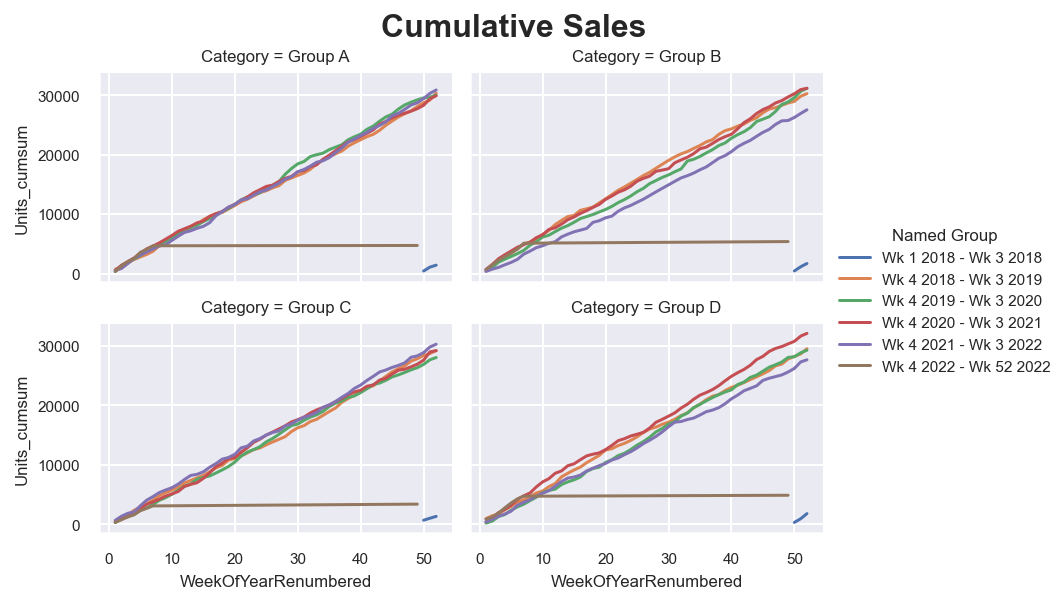

In [8]:
g = sns.relplot(data=df_week, x='WeekOfYearRenumbered', y='Units_cumsum', 
                hue='Named Group', col='Category', kind='line', col_wrap=2, height=2, aspect=1.5);
g.fig.suptitle("Cumulative Sales", fontsize=16, fontweight='bold', y=1.03);

## Format ticks

Week 0 needs to map to 4. Doesn't really work for years with 53 weeks.

In [9]:
def format_tick(x, pos):
    return f'{(x + WEEK_SHIFT) % 52:.0f}'

for ax in g.fig.axes:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_tick))

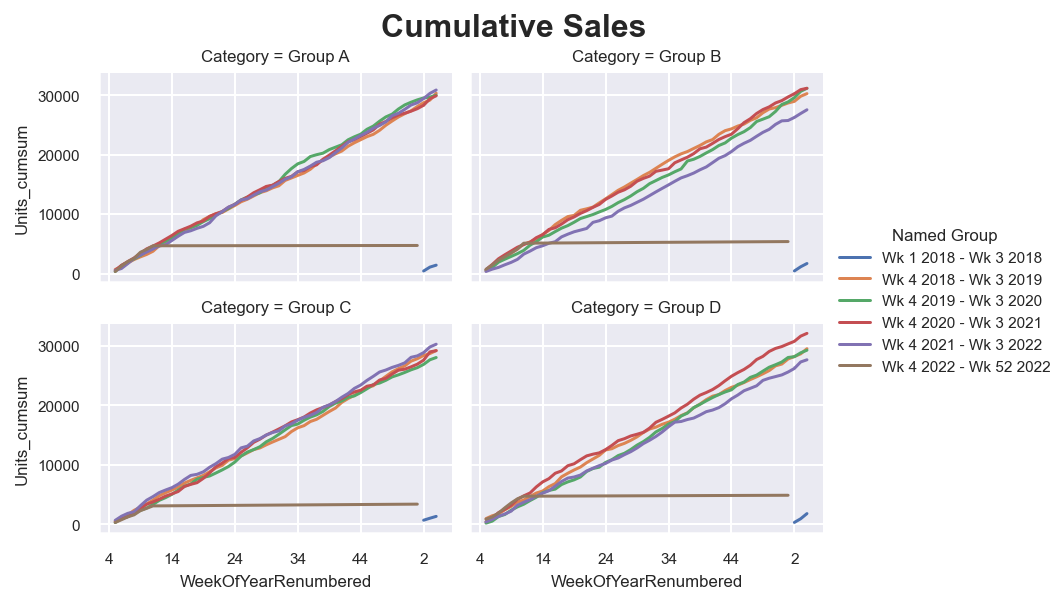

In [10]:
g.fig

## Putting it all together

In [11]:
WEEK_SHIFT = 10

def week_transform(x):
    x = x - WEEK_SHIFT + 1
    return np.where(x < 1, x + max(52, x.max()), x)

def format_tick(x, pos):
    return f'{(x + WEEK_SHIFT) % 52:.0f}'

def shift_graph(df):
    df_week = df.groupby(['Category', 'Year', 'WeekOfYear'])['Units_Sold'].sum().reset_index(name='Units')
    df_week['Time Group'] = df_week.groupby('Category')['WeekOfYear'].transform(lambda x: (x == WEEK_SHIFT).cumsum())
    g = df_week.groupby(['Category', 'Time Group'])

    first_week = g['WeekOfYear'].transform('first').astype('str')
    last_week = g['WeekOfYear'].transform('last').astype('str')

    first_year = g['Year'].transform('first').astype('str')
    last_year = g['Year'].transform('last').astype('str')

    df_week['Named Group'] = 'Wk ' + first_week + ' ' + first_year + ' - ' + 'Wk ' + last_week + ' ' + last_year

    df_week['Units_cumsum'] = df_week.groupby(['Category', 'Named Group'])['Units'].cumsum()
    df_week['WeekOfYearRenumbered'] = df_week.groupby(['Category', 
                                                       'Named Group'])['WeekOfYear'].transform(week_transform)
    g = sns.relplot(data=df_week, x='WeekOfYearRenumbered', y='Units_cumsum', 
                hue='Named Group', col='Category', kind='line', col_wrap=2, height=2, aspect=1.5);
    g.fig.suptitle("Cumulative Sales", fontsize=16, fontweight='bold', y=1.03);
    for ax in g.fig.axes:
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_tick))

Run code

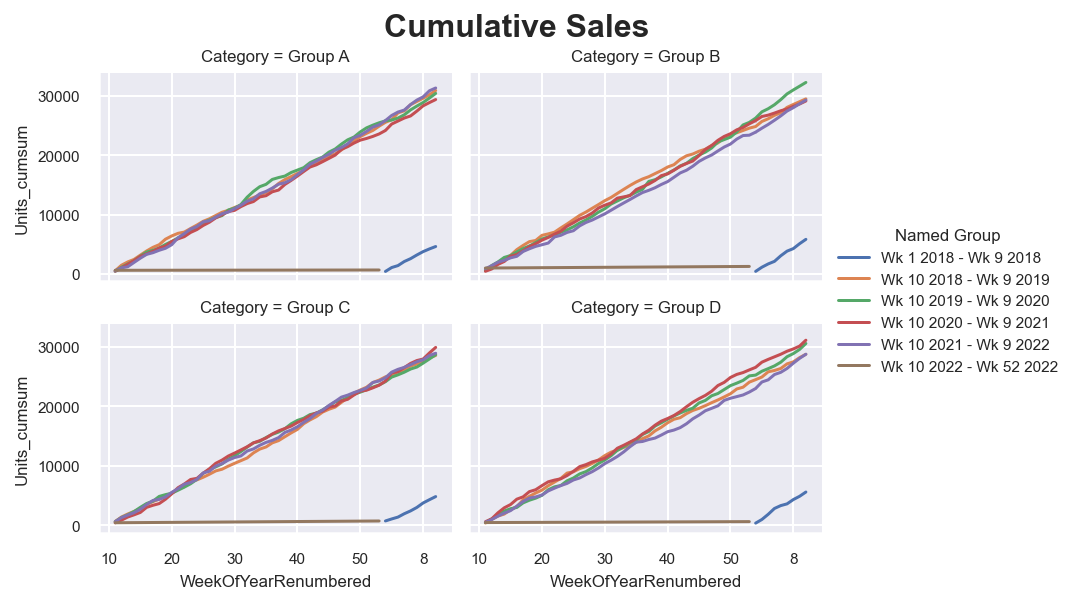

In [12]:
shift_graph(df)